In [1]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install --upgrade tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 1.8 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
# API authentication

auth = tweepy.OAuthHandler('Zuah3SHPyrYZJRrqfladxzsDj', 'sqcpXcg90jZJ68BJkx0QhHNs2pG4al1slbEe7vO63xIfRTlXej')

#set access token 

auth.set_access_token('222050461-BPfTuaF75V7lYKLgXDSMUfP8v0EcnewObf6gzfCr', 'etAXBGMedOpWEn0bl8EqN0SaFixapHpahVcfuxk4BhHhZ')

#create API object while passing authentication information

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# search hastags

keywords = '#Agniveer' or '#AgnipathScheme'
limit = 100000

tweets = tweepy.Cursor(api.search_tweets, q=keywords,lang='en', count=100, tweet_mode='extended').items(limit)

i= 1
for t in tweets:
  print(str(i)+ ') '+ str(t._json['retweet_count']) + '\n')
  i = i+ 1

Streaming output truncated to the last 5000 lines.
2688) 8

2689) 282

2690) 162

2691) 3

2692) 182

2693) 8

2694) 1

2695) 36

2696) 45

2697) 17

2698) 36

2699) 10

2700) 5

2701) 17

2702) 10

2703) 162

2704) 10

2705) 17

2706) 36

2707) 45

2708) 12

2709) 45

2710) 0

2711) 5

2712) 3

2713) 1

2714) 42

2715) 10

2716) 10

2717) 28

2718) 8

2719) 8

2720) 17

2721) 4

2722) 10

2723) 8

2724) 17

2725) 42

2726) 10

2727) 0

2728) 10

2729) 36

2730) 10

2731) 36

2732) 7

2733) 17

2734) 12

2735) 162

2736) 8

2737) 45

2738) 45

2739) 45

2740) 8

2741) 45

2742) 8

2743) 8

2744) 36

2745) 0

2746) 45

2747) 894

2748) 272

2749) 10

2750) 13

2751) 10

2752) 45

2753) 505

2754) 442

2755) 36

2756) 162

2757) 10

2758) 8

2759) 10

2760) 894

2761) 17

2762) 7

2763) 0

2764) 36

2765) 0

2766) 14

2767) 43

2768) 45

2769) 0

2770) 4

2771) 7

2772) 45

2773) 4

2774) 23

2775) 10

2776) 0

2777) 0

2778) 4

2779) 45

2780) 45

2781) 45

2782) 103

2783) 45

2784) 4


In [7]:
# create a dataframe for tweets
keywords = ['#Agniveer' or '#AgnipathScheme']
limit = 10000

# this cursor object should be in same cell
tweets = tweepy.Cursor(api.search_tweets, q=keywords,lang='en', count=100, since_id='2022-06-14', tweet_mode='extended').items(limit)


df = pd.DataFrame([[tweet.user.screen_name, tweet.full_text] for tweet in tweets], columns=['User', 'Tweets'])

df.head()

,User,Tweets
0,_Mahakal_D_,RT @ADiravia: @SanjayV_INC @OfficeOfKNath @jit...
1,TiagoMa64703078,RT @pradeepnambiar4: #Agniveer A Success.\n\n#...
2,MohdYou43460317,RT @Shaurya121095: This is the #Agniveer revol...
3,MohdYou43460317,RT @devvshuklaa: Be witness to #Agniveer revol...
4,MohdYou43460317,RT @Varun83086413: Be witness to #Agniveer rev...


In [8]:
# Data cleaning

def clearText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # to remove @ mentions in tweets
  text = re.sub(r'RT[\s]+', '', text) # remove RT
  text = re.sub(r'https?:\/\/\S+', '', text) # remove links
  text = re.sub(r'#', '', text) # remove hashtags
  return text

# cleaning the text
df['Tweets'] = df['Tweets'].apply(clearText) 

# show clean text

df

,User,Tweets
0,_Mahakal_D_,: _INC So brutal ! What ever ..it may be t...
1,TiagoMa64703078,: Agniveer A Success.\n\nSameerWankhede awarde...
2,MohdYou43460317,: This is the Agniveer revolution in Kashmir ....
3,MohdYou43460317,: Be witness to Agniveer revolution in Kashmir...
4,MohdYou43460317,: Be witness to Agniveer revolution in Kashmir...
...,...,...
5182,YougenderRana,First NPS then 3 Farm law flwd by Agniveer &am...
5183,YougenderRana,First NPS then 3 Farm law flwd by Agniveer &...
5184,Ud60505336Ahmed,: Army canteen is a big incentive for armed fo...
5185,IndieGourmand,: puts paid to the lie JJ Singh told Sachar C...


In [9]:
# function to get subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# function to get polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity
  

# adding subjectivity and polarity in dataframe

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# show dataframe with new columns

df

,User,Tweets,Subjectivity,Polarity
0,_Mahakal_D_,: _INC So brutal ! What ever ..it may be t...,1.000000,-1.000000
1,TiagoMa64703078,: Agniveer A Success.\n\nSameerWankhede awarde...,0.000000,0.300000
2,MohdYou43460317,: This is the Agniveer revolution in Kashmir ....,0.583333,0.166667
3,MohdYou43460317,: Be witness to Agniveer revolution in Kashmir...,0.600000,0.700000
4,MohdYou43460317,: Be witness to Agniveer revolution in Kashmir...,0.600000,0.700000
...,...,...,...,...
5182,YougenderRana,First NPS then 3 Farm law flwd by Agniveer &am...,0.500000,-0.225000
5183,YougenderRana,First NPS then 3 Farm law flwd by Agniveer &...,0.500000,-0.225000
5184,Ud60505336Ahmed,: Army canteen is a big incentive for armed fo...,0.100000,0.000000
5185,IndieGourmand,: puts paid to the lie JJ Singh told Sachar C...,0.500000,0.000000


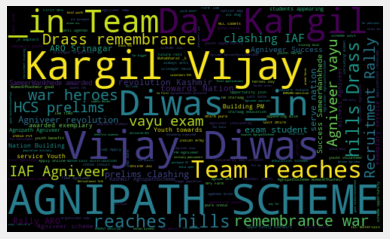

In [10]:
# visualize the wordcloud (not needed for opinion formation model)

allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=120).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
# function for analysis to find negative, positive and neutral tweets

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score > 0:
    return 'Positive'
  else:
    return 'Neutral'

# new column to store analysis 

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df.head(50)

,User,Tweets,Subjectivity,Polarity,Analysis
0,_Mahakal_D_,: _INC So brutal ! What ever ..it may be t...,1.000000,-1.000000,Negative
1,TiagoMa64703078,: Agniveer A Success.\n\nSameerWankhede awarde...,0.000000,0.300000,Positive
2,MohdYou43460317,: This is the Agniveer revolution in Kashmir ....,0.583333,0.166667,Positive
3,MohdYou43460317,: Be witness to Agniveer revolution in Kashmir...,0.600000,0.700000,Positive
4,MohdYou43460317,: Be witness to Agniveer revolution in Kashmir...,0.600000,0.700000,Positive
5,shafiLone11,: Recruitment Rally by ARO Srinagar being orga...,0.000000,0.000000,Neutral
6,Parvaiz20221202,: Be witness to Agniveer revolution in Kashmir...,0.600000,0.700000,Positive
7,ColAmitkumar,Economy going good or bad?? TAXES EVERYWHERE! ...,0.450000,-0.063889,Negative
8,Parvaiz20221202,: Recruitment Rally by ARO Srinagar being orga...,0.000000,0.000000,Neutral
9,Parvaiz20221202,": ""Kashmir youth have an opportunity to join a...",0.000000,0.000000,Neutral


In [12]:
p,n,nu = 0, 0, 0
for i in df['Analysis']:
  if i == 'Positive':
    p = p+1
  elif i == 'Negative':
    n = n+1
  else:
    nu = nu+1

print('positive: ', p)
print('negative: ', n)
print('neutral: ', nu)

positive:  1768
negative:  376
neutral:  3043


In [13]:
dfc = df.drop_duplicates(keep='first')

In [14]:
dfc

,User,Tweets,Subjectivity,Polarity,Analysis
0,_Mahakal_D_,: _INC So brutal ! What ever ..it may be t...,1.000000,-1.000000,Negative
1,TiagoMa64703078,: Agniveer A Success.\n\nSameerWankhede awarde...,0.000000,0.300000,Positive
2,MohdYou43460317,: This is the Agniveer revolution in Kashmir ....,0.583333,0.166667,Positive
3,MohdYou43460317,: Be witness to Agniveer revolution in Kashmir...,0.600000,0.700000,Positive
4,MohdYou43460317,: Be witness to Agniveer revolution in Kashmir...,0.600000,0.700000,Positive
...,...,...,...,...,...
5168,YougenderRana,First NPS then 3 Farm law flwd by Agniveer &...,0.500000,-0.225000,Negative
5169,VivekGu31149538,_: They want2 know d religion of an Agniveer s...,0.066667,0.000000,Neutral
5184,Ud60505336Ahmed,: Army canteen is a big incentive for armed fo...,0.100000,0.000000,Neutral
5185,IndieGourmand,: puts paid to the lie JJ Singh told Sachar C...,0.500000,0.000000,Neutral


In [15]:
df

,User,Tweets,Subjectivity,Polarity,Analysis
0,_Mahakal_D_,: _INC So brutal ! What ever ..it may be t...,1.000000,-1.000000,Negative
1,TiagoMa64703078,: Agniveer A Success.\n\nSameerWankhede awarde...,0.000000,0.300000,Positive
2,MohdYou43460317,: This is the Agniveer revolution in Kashmir ....,0.583333,0.166667,Positive
3,MohdYou43460317,: Be witness to Agniveer revolution in Kashmir...,0.600000,0.700000,Positive
4,MohdYou43460317,: Be witness to Agniveer revolution in Kashmir...,0.600000,0.700000,Positive
...,...,...,...,...,...
5182,YougenderRana,First NPS then 3 Farm law flwd by Agniveer &am...,0.500000,-0.225000,Negative
5183,YougenderRana,First NPS then 3 Farm law flwd by Agniveer &...,0.500000,-0.225000,Negative
5184,Ud60505336Ahmed,: Army canteen is a big incentive for armed fo...,0.100000,0.000000,Neutral
5185,IndieGourmand,: puts paid to the lie JJ Singh told Sachar C...,0.500000,0.000000,Neutral


In [16]:
from google.colab import files
dfc.to_csv('MenToo_cleanData_updated.csv', encoding='utf-8-sig')
files.download('MenToo_cleanData_updated.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

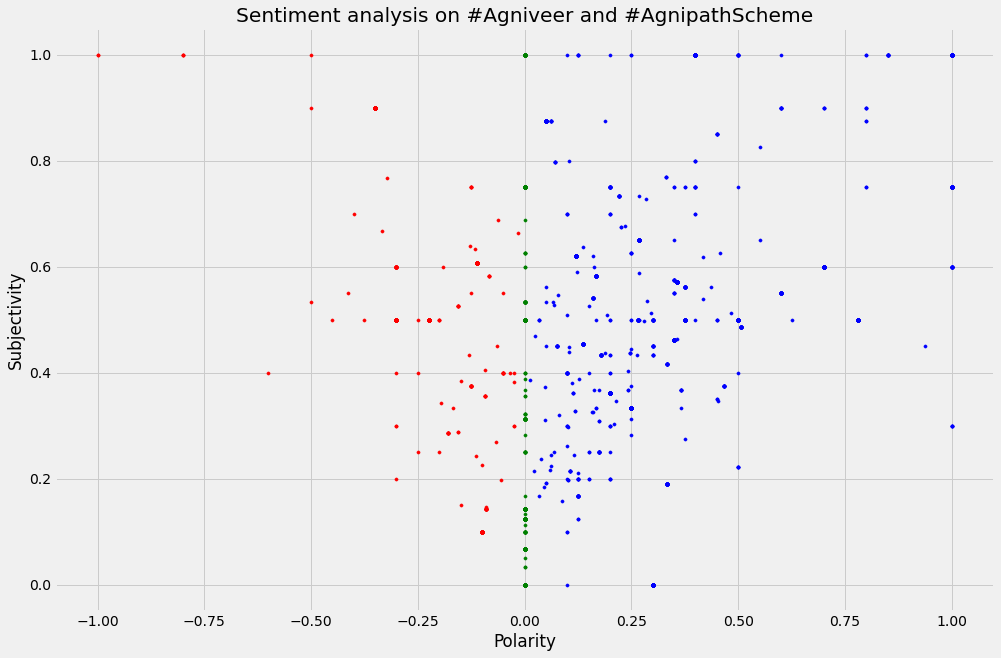

In [17]:
# plot polarity and subjectivity

plt.figure(figsize=(15,10))
for i in range(0, df.shape[0]):
  if df['Analysis'][i] == 'Positive':
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue', s=10)   # s=10 used for markersize
  elif df['Analysis'][i] == 'Negative':
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Red', s=10)   # s=10 used for markersize
  else:
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Green', s=10)   # s=10 used for markersize

plt.title('Sentiment analysis on #Agniveer and #AgnipathScheme')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()